In [1]:
library(tidyverse)
library(ape)
library(microbiome)
library(ggthemes)     # additional themes fro ggplot2
library(ggpubr)
library(vegan)
library(repr)
library(ggpmisc)      # to use stat_poly_eq
library(RColorBrewer) # nice color options
library(gridExtra)    # gridding plots
library(viridis)
library(ggrepel)
#library(wesanderson) #new palettes http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually
library(rioja)        # plotting poackages for tabular bubbleplots
library(reshape2) 
library(dada2)
library(DECIPHER)
#library(ggtern)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform



Attaching package: ‘ggpubr’




In [2]:
options(repr.plot.width=12, repr.plot.height=8)
set.seed(10000)

theme_glab <- function(base_size = 20,
                    base_family = "",
                    base_line_size = base_size / 180,
                    base_rect_size = base_size / 180) {
   
    font <- "Helvetica" #assign font family up front
   
    theme_bw(base_size = base_size,
                base_family = base_family,
                base_line_size = base_line_size) %+replace%
    theme(
        legend.background =  element_blank(),
        legend.title =       element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65),
                                         hjust = 0),
        legend.text =        element_text(color = rgb(100, 100, 100, maxColorValue = 255),
                                          size = rel(0.65)),
        legend.key.size =    unit(0.8, "lines"),
     
      plot.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        hjust = 0),
       
      axis.title = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
      axis.text = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.65)),
       
      plot.caption = element_text(
        color = rgb(100, 100, 100, maxColorValue = 255),
        size = rel(0.7),
        hjust = 1),
       
      panel.grid.major = element_blank(),  
      panel.grid.minor = element_blank(),  
      panel.border = element_rect(fill = NA, colour = rgb(100, 100, 100, maxColorValue = 255)),

     
      complete = TRUE
    )
}


In [3]:
CAs_otu_raw <- read.csv("dataset_CoEvolve/Coevolve_distribution_bacteria.csv", sep="\t", header=TRUE)

CAs_otu_raw

Expedition,hmm,CA_class,Total.coverage,Normalized_total_coverage,Sample
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
arg19,Beta_CA_arch,Beta,40.3404,1.4006414,AG11
arg19,Beta_CA_arch,Beta,318.5506,14.9013800,AG13
arg19,Beta_CA_arch,Beta,281.1557,32.6241870,AG15
arg19,Beta_CA_arch,Beta,29.3973,3.1516099,AG17
arg19,Beta_CA_arch,Beta,58.1551,1.4622546,AG19
arg19,Beta_CA_arch,Beta,96.5620,1.1098483,AG1
arg19,Beta_CA_arch,Beta,10.0679,0.4006933,AG22
arg19,Beta_CA_arch,Beta,123.0411,3.1837459,AG24
arg19,Beta_CA_arch,Beta,314.5399,7.2359227,AG3


In [4]:
subset1 <- as.data.frame(CAs_otu_raw[, c("hmm", "Normalized_total_coverage", "Sample")])
subset2 <- subset1[!duplicated(subset1),]
otu_table <- as.data.frame(subset2 %>% pivot_wider(names_from = Sample, 
                                                   values_from = Normalized_total_coverage, 
                                                   values_fill = list(Value = 0)))
row.names(otu_table) <- otu_table$hmm
otu_table$hmm <- NULL


otu_table

,AG11,AG13,AG15,AG17,AG19,AG1,AG22,AG24,AG3,AG7,⋯,KR-2-F,KR-2-S,AG5,CQ200302F,CT200308F,EM200307F,EM200307S,PM200308F,PM200308S,BQS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Beta_CA_arch,1.400641,14.90138,32.62419,3.15161,1.462255,1.109848,0.4006933,3.183746,7.235923,10.04018,⋯,83.63556,60.55595,NA,NA,NA,NA,NA,NA,NA,NA
Gamma_CA_arch,73.207045,141.54334,559.58317,33.68449,37.144254,33.004217,127.9348352,36.772182,72.574142,120.51098,⋯,286.51039,196.09878,105.5139,826.3468,69.23813,16.29923,10.20437,1360.723,9.805587,1178.834


In [5]:
otu_table_final <- as.data.frame(otu_table)
otu_table_final[is.na(otu_table_final)] <- 0

otu_table_final

,AG11,AG13,AG15,AG17,AG19,AG1,AG22,AG24,AG3,AG7,⋯,KR-2-F,KR-2-S,AG5,CQ200302F,CT200308F,EM200307F,EM200307S,PM200308F,PM200308S,BQS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Beta_CA_arch,1.400641,14.90138,32.62419,3.15161,1.462255,1.109848,0.4006933,3.183746,7.235923,10.04018,⋯,83.63556,60.55595,0.0000,0.0000,0.00000,0.00000,0.00000,0.000,0.000000,0.000
Gamma_CA_arch,73.207045,141.54334,559.58317,33.68449,37.144254,33.004217,127.9348352,36.772182,72.574142,120.51098,⋯,286.51039,196.09878,105.5139,826.3468,69.23813,16.29923,10.20437,1360.723,9.805587,1178.834


In [6]:
tax_table_raw  <- as.data.frame(CAs_otu_raw[, c("hmm", "CA_class")])
tax_table <- tax_table_raw[!duplicated(tax_table_raw), ]
row.names(tax_table) <- tax_table$hmm

tax_table

tax_table <- as.matrix(tax_table)

,hmm,CA_class
,<chr>,<chr>
Beta_CA_arch,Beta_CA_arch,Beta
Gamma_CA_arch,Gamma_CA_arch,Gamma


In [7]:
sample_data <- read.csv("dataset_CoEvolve/Coevolve_env_data.csv", row.names=1)
sample_data_final <-as.data.frame(sample_data)
sample_data_final

,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG1,ARG19,Argentina,Incachule,-24.282129,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000.0
AG11,ARG19,Argentina,Pastos Grandes,-24.364589,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288.0
AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858188,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429.0
AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.858243,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050.0
AG17,ARG19,Argentina,Galán La Colcha,-26.032911,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618.0
AG19,ARG19,Argentina,Botijuela,-25.743034,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643.0
AG22,ARG19,Argentina,Rosario de la Frontera,-25.409860,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056.0
AG24,ARG19,Argentina,El Galpón,-24.409860,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474.0
AG3,ARG19,Argentina,Pompeya,-24.246688,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000.0


In [8]:
CAs <- phyloseq(
    otu_table(otu_table_final, taxa_are_rows = T),
    tax_table(tax_table),
    sample_data(sample_data_final)
)

CAs

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 139 samples ]
sample_data() Sample Data:       [ 139 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

## alpha_diversity

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


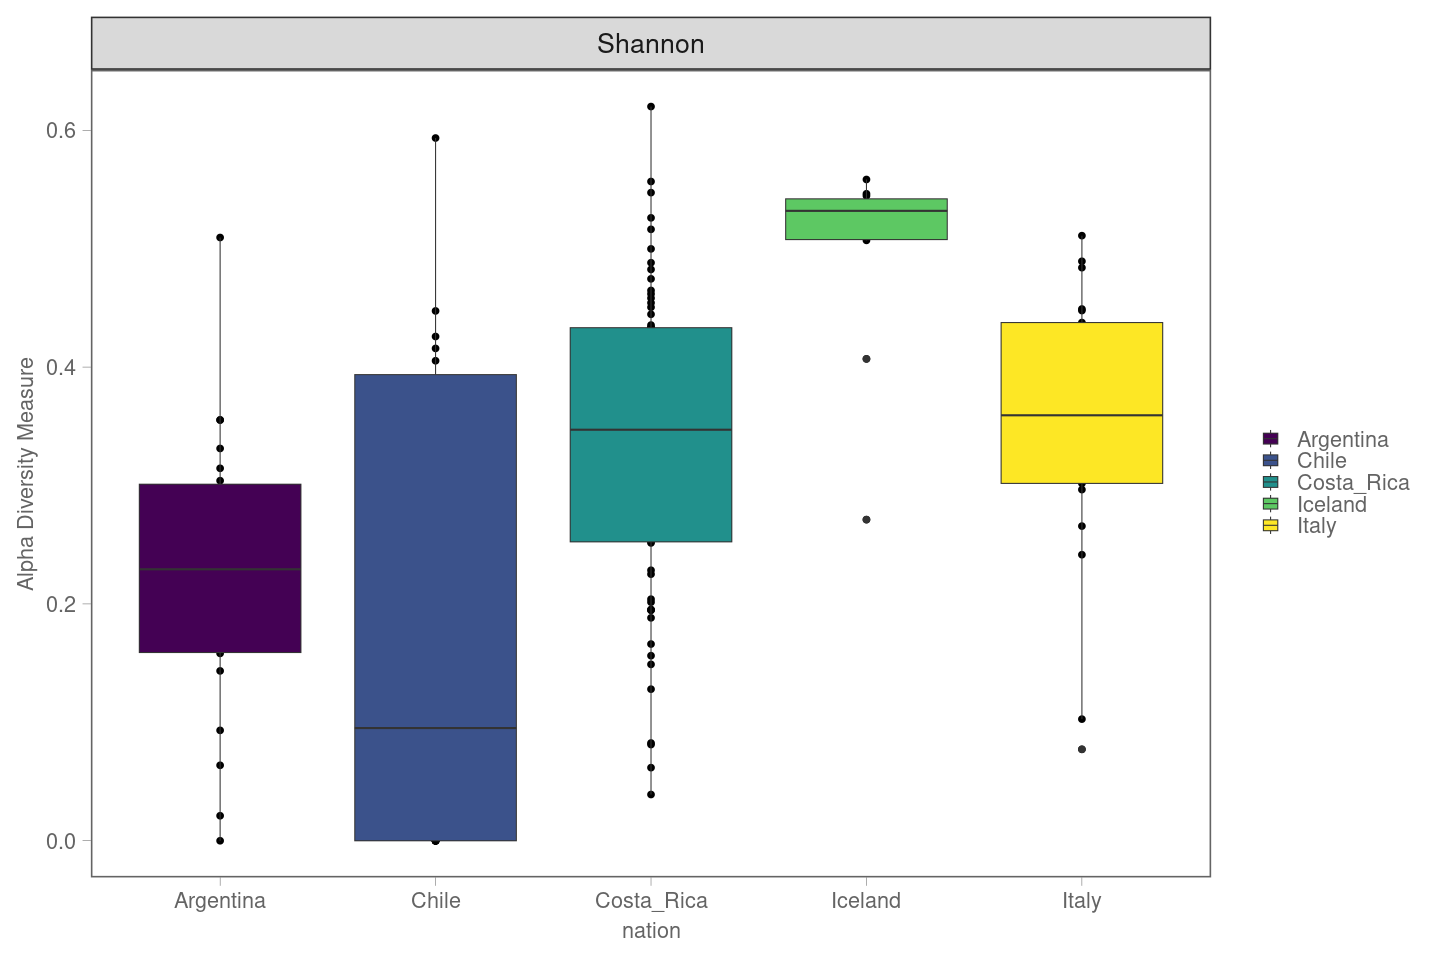

In [9]:
p.alph_div <- plot_richness(CAs, measures=c("shannon"), x="nation") + 

geom_boxplot(aes(fill=nation), lwd=0.3) +  

scale_fill_viridis(discrete=T) +

#scale_fill_manual(values = c("#B2182B", "#D6604D", "#F4A582", "#FDDBC7", "#D1E5F0"),
                  #labels=c("x","y","z")) +

#scale_x_discrete(name="",labels=c("x","y","z")) +

theme_glab() + theme(legend.title = element_blank())

p.alph_div

In [10]:
data.frame(sample_data(CAs))

,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,ARG19,Argentina,Pastos Grandes,-24.36459,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288
AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85819,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429
AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85824,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050
AG17,ARG19,Argentina,Galán La Colcha,-26.03291,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618
AG19,ARG19,Argentina,Botijuela,-25.74303,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643
AG1,ARG19,Argentina,Incachule,-24.28213,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000
AG22,ARG19,Argentina,Rosario de la Frontera,-25.40986,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056
AG24,ARG19,Argentina,El Galpón,-24.40986,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474
AG3,ARG19,Argentina,Pompeya,-24.24669,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000


In [11]:
CAs_alpha <- data.frame(
                        estimate_richness(CAs, measures = c("Shannon")),
                        data.frame(sample_data(CAs)$temperature),
                        data.frame(sample_data(CAs)$pH),
                        data.frame(sample_data(CAs)$salinity),
                        data.frame(sample_data(CAs)$nation)
)
CAs_alpha

Warning message in estimate_richness(CAs, measures = c("Shannon")):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


,Shannon,sample_data.CAs..temperature,sample_data.CAs..pH,sample_data.CAs..salinity,sample_data.CAs..nation
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AG11,0.09322631,44.90,8.74,0.61,Argentina
AG13,0.31451929,80.00,7.75,0.19,Argentina
AG15,0.21323559,80.00,3.21,1.02,Argentina
AG17,0.29213753,84.00,6.94,6.10,Argentina
AG19,0.16113374,40.00,6.44,8.65,Argentina
AG1,0.14344130,46.90,6.52,1.54,Argentina
AG22,0.02113016,82.00,8.23,1.57,Argentina
AG24,0.27799065,54.30,8.47,1.81,Argentina
AG3,0.30407205,50.30,6.53,5.09,Argentina


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.”
Warning message:
“Removed 10 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 10 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


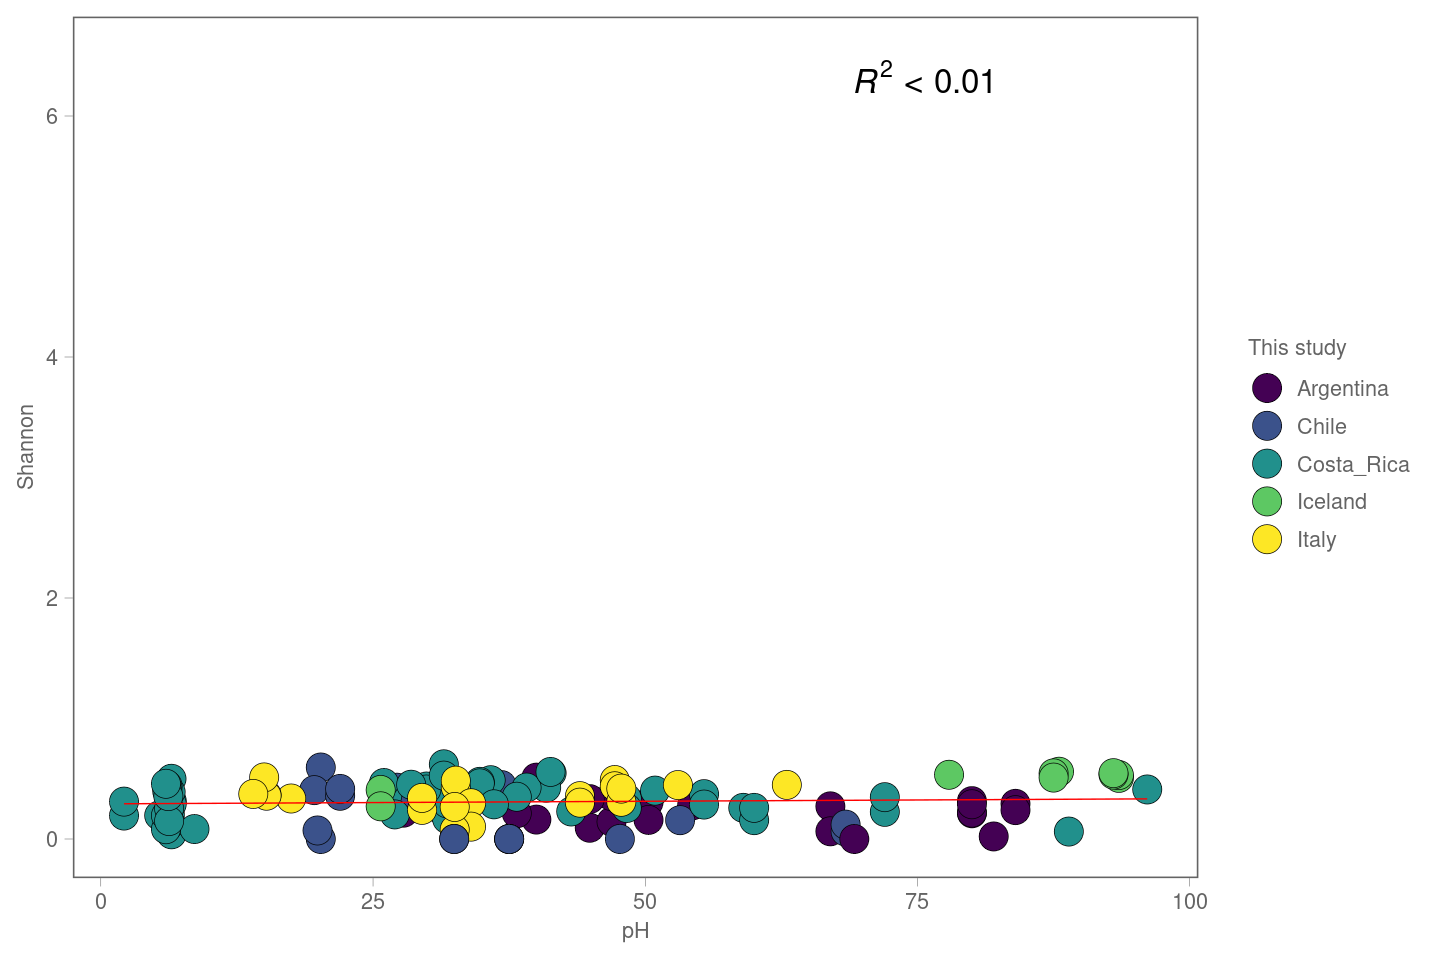

In [12]:
p.shan_temp <-ggplot(CAs_alpha,aes(x=sample_data.CAs..temperature,y=Shannon)) + 
geom_point(size=8,aes(fill=sample_data.CAs..nation),stroke=.3, shape=21)  +
scale_fill_viridis(discrete=TRUE) +
# scale_fill_manual(values=c("#440154","#3b528b","#2a788e","#fde725")) +
# geom_text(aes(label= sample_data.prok_ndata..code), size=5, hjust=-0.1, vjust=2.2) +
stat_poly_eq(formula = y ~ x, aes(label = paste(..rr.label.., sep = "~~")), parse = TRUE,hjust=-5,size=7) +
             geom_smooth(method=lm, formula= y~x,  se=FALSE,color="red",size=.4) +
xlab("pH") + 
guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
labs(fill="This study", shape="Sample type") + 
ylim(NA,6.5) +
theme_glab()

p.shan_temp

Warning message:
“Removed 11 rows containing non-finite values (`stat_poly_eq()`).”
Warning message:
“Removed 11 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


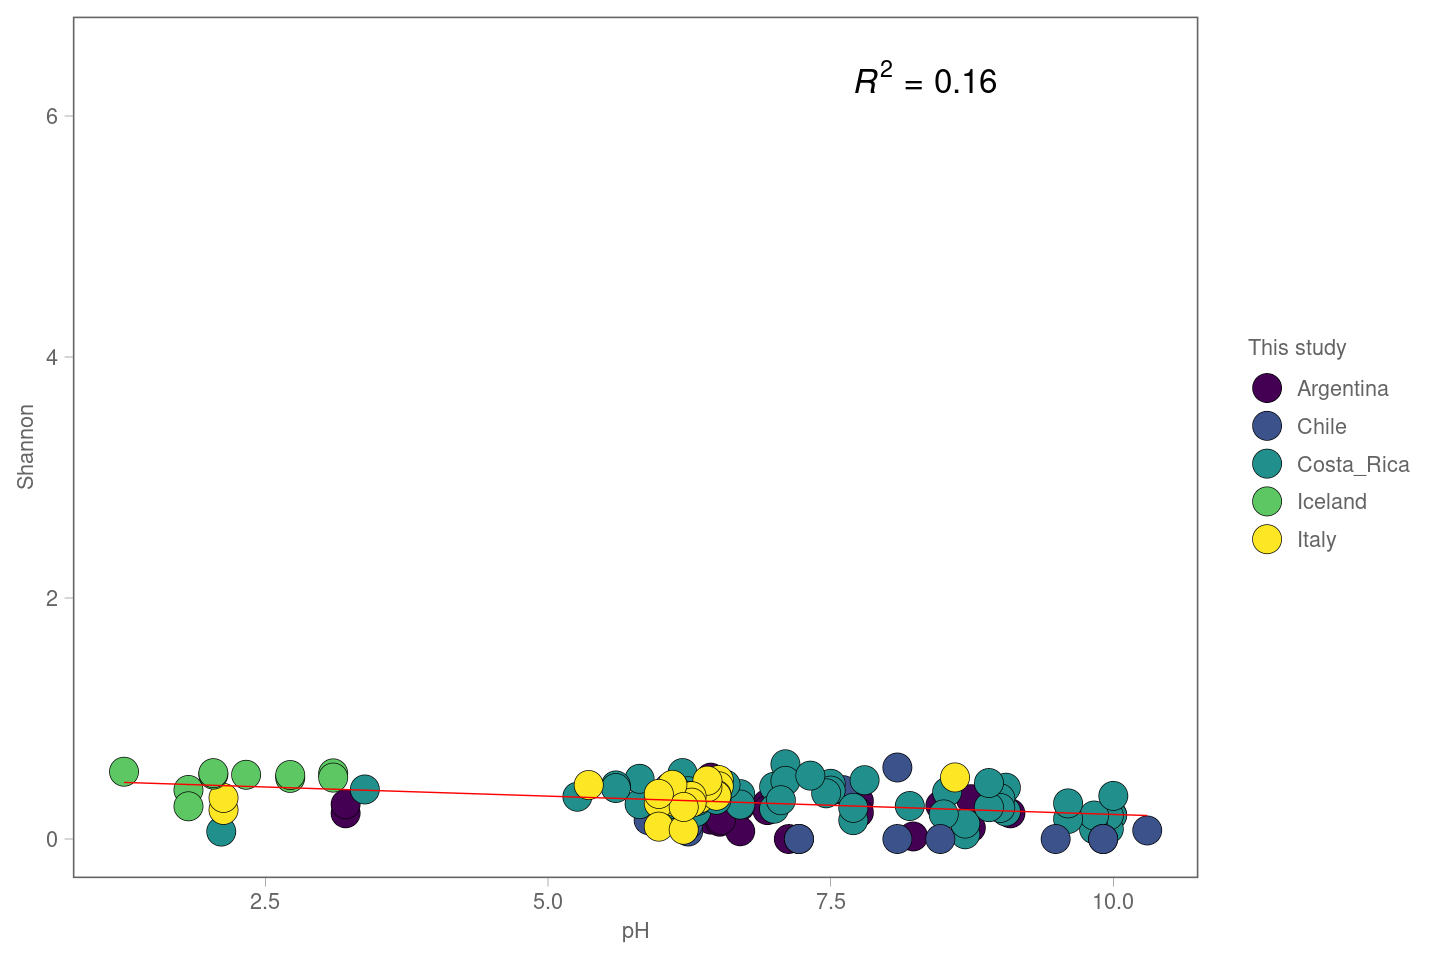

In [13]:
p.shan_temp <-ggplot(CAs_alpha,aes(x=sample_data.CAs..pH,y=Shannon)) + 
geom_point(size=8,aes(fill=sample_data.CAs..nation),stroke=.3, shape=21)  +
scale_fill_viridis(discrete=TRUE) +
# scale_fill_manual(values=c("#440154","#3b528b","#2a788e","#fde725")) +
# geom_text(aes(label= sample_data.prok_ndata..code), size=5, hjust=-0.1, vjust=2.2) +
stat_poly_eq(formula = y ~ x, aes(label = paste(..rr.label.., sep = "~~")), parse = TRUE,hjust=-5,size=7) +
             geom_smooth(method=lm, formula= y~x,  se=FALSE,color="red",size=.4) +
xlab("pH") + 
guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
labs(fill="This study", shape="Sample type") + 
ylim(NA,6.5) +
theme_glab()

p.shan_temp

Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


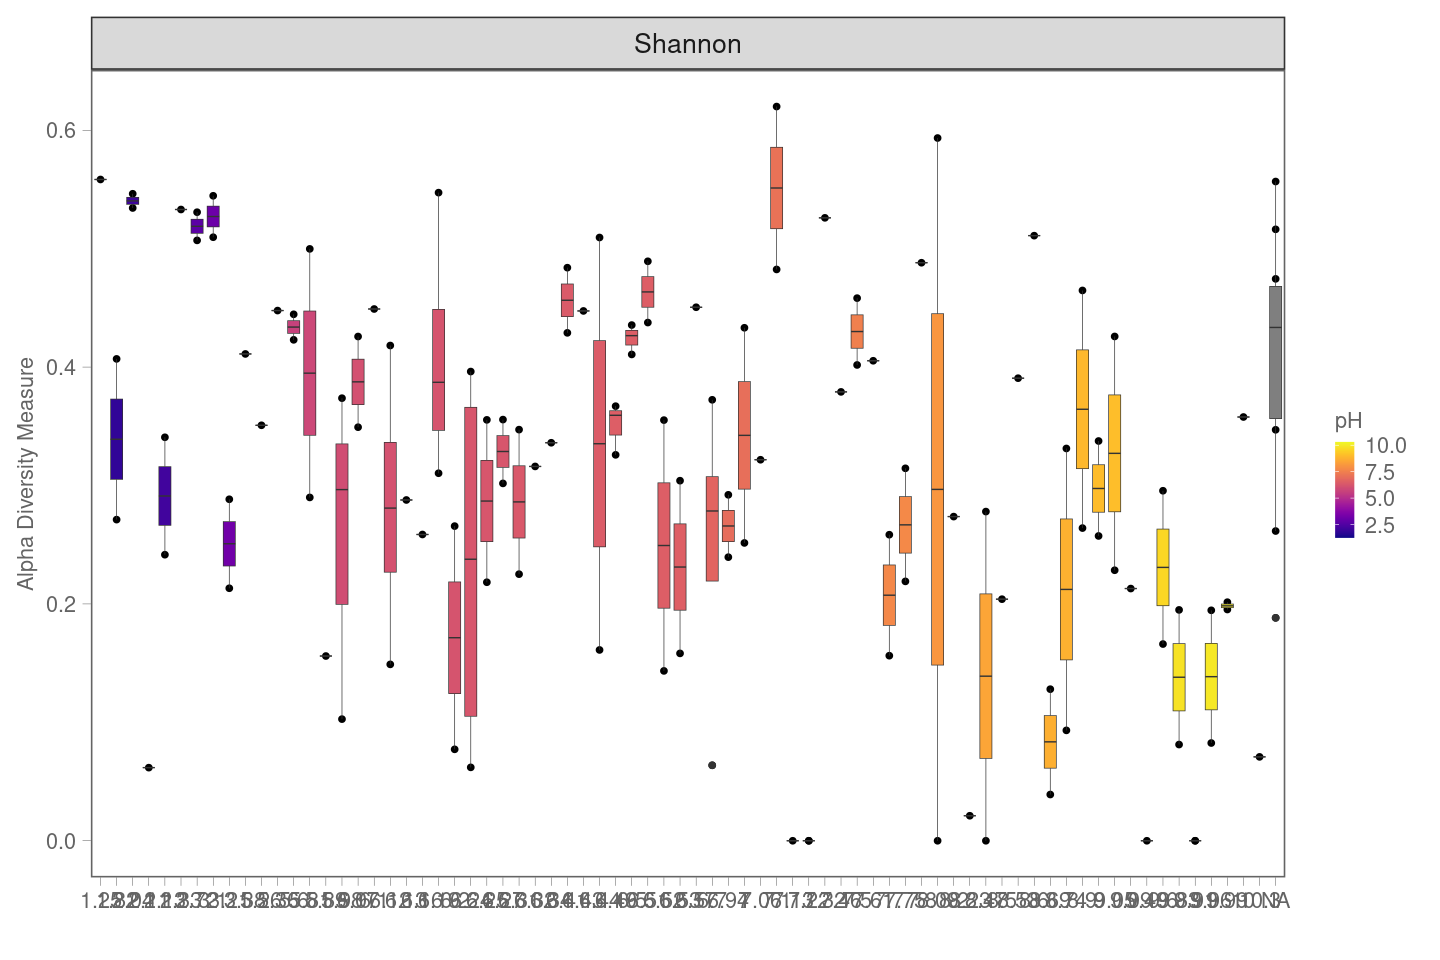

In [14]:
plot_richness(CAs, measures=c("shannon"), x="as.factor(pH)") + 
geom_boxplot(aes(fill=pH),lwd=0.2) +  

scale_fill_viridis(discrete=F,option="plasma") + 


labs(x="") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
                     axis.text=element_text(size=12,face="bold")) + theme_glab()

## BARPLOTS

In [15]:
CAs_norm = transform_sample_counts(CAs, function(x){x / sum(x)})
CAs_norm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 139 samples ]
sample_data() Sample Data:       [ 139 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

In [16]:
CAs_hmm = tax_glom(CAs_norm, "hmm", NArm = FALSE)
CAs_hmm

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 139 samples ]
sample_data() Sample Data:       [ 139 samples by 13 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 2 taxonomic ranks ]

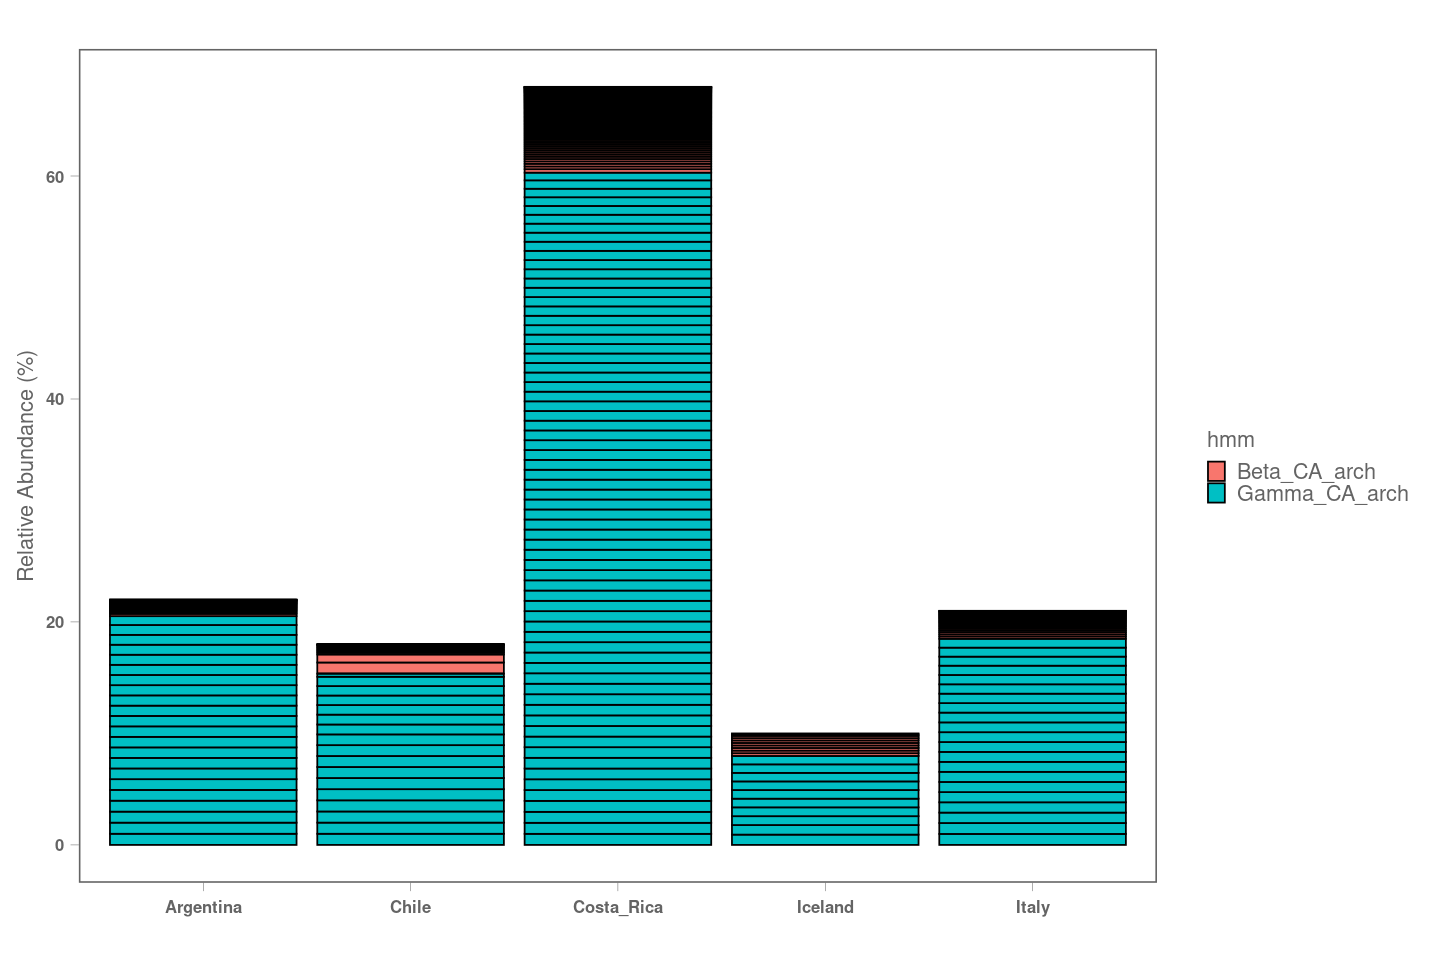

In [17]:
phyl_bio <- plot_bar(subset_samples(CAs_hmm), fill="hmm", x="nation", title = "") +  

#gghighlight(phyl_bio$data$Abundance > 0.009, use_group_by = FALSE) +

labs(x="",
     y="Relative Abundance (%)") +

theme_glab() + theme(legend.position = "right")+
theme(axis.text.x = element_text(angle = 0, vjust = 0.25, hjust=0.5),
      axis.text=element_text(size=10,face="bold")) 

phyl_bio

## Beta-Diversity analysis
## NMDS Jaccard similarity index: Weighted and Unweighted
## Weighted PCoA Jaccard

In [18]:
CAs_wjak <- phyloseq::distance(CAs, method = "bray")
CAs_jw <- ordinate(CAs,CAs_wjak, method = "PCoA")
evals_jw <- CAs_jw$values$Eigenvalues

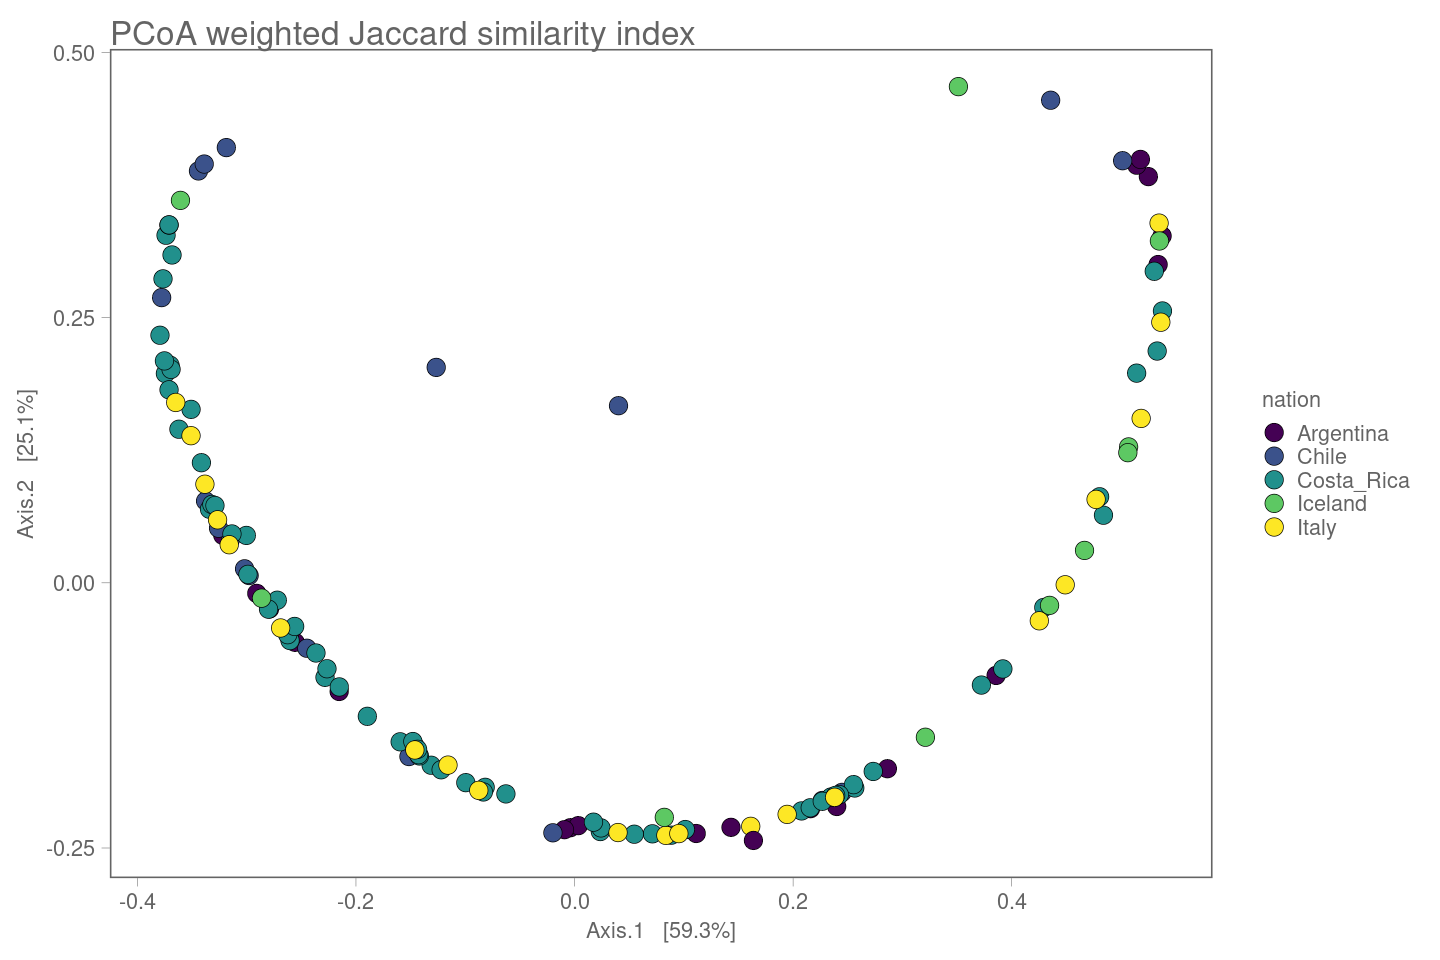

In [19]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=nation), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=T) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

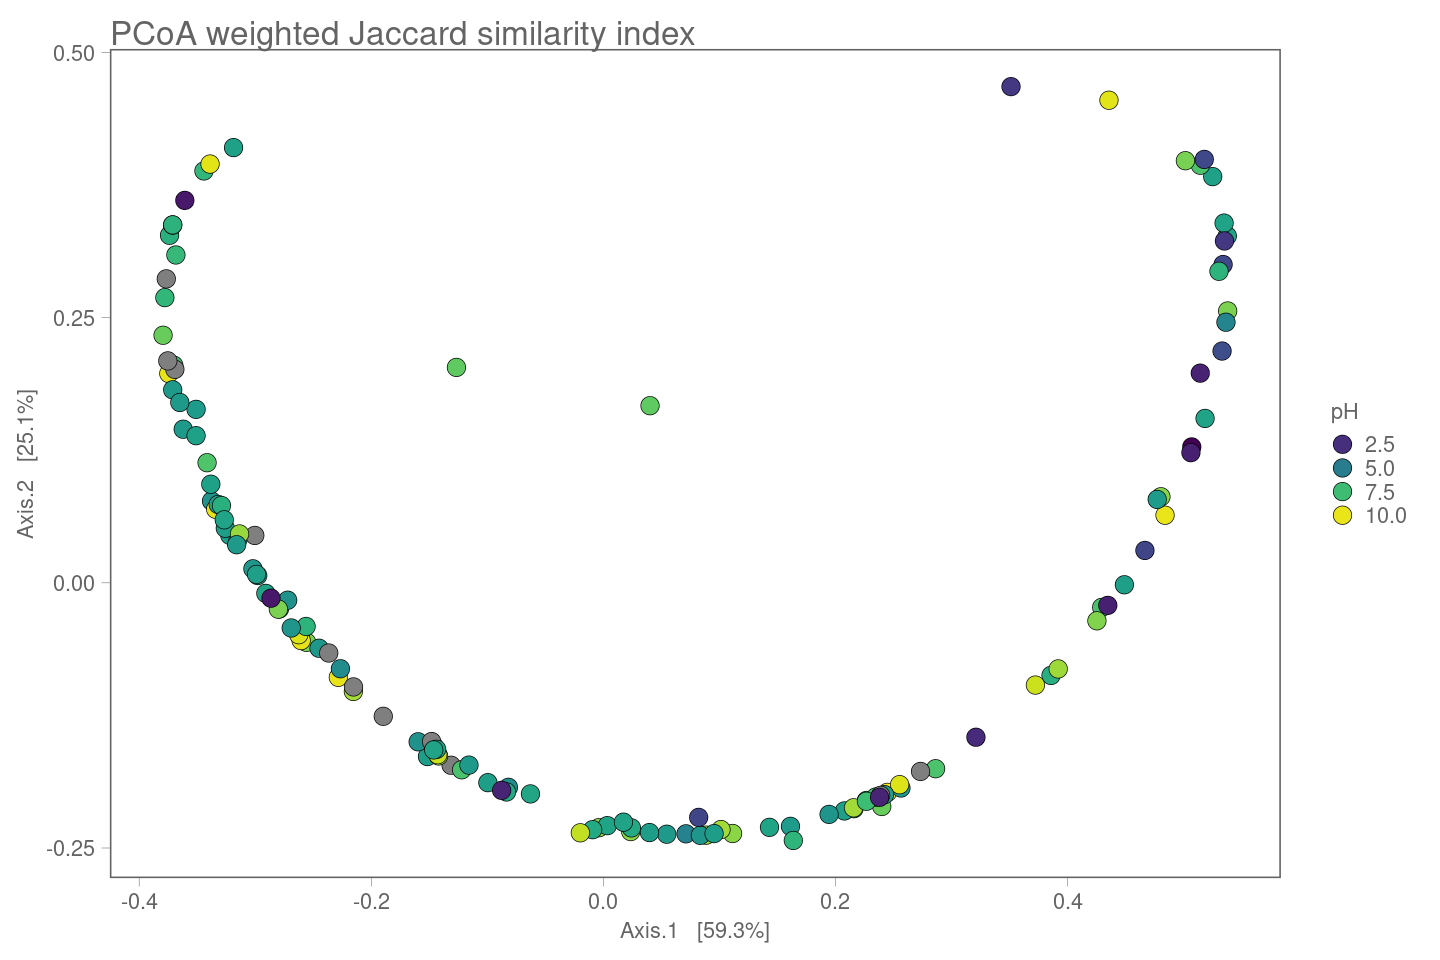

In [20]:
p1 <- plot_ordination(CAs, CAs_jw, type="sample", title="PCoA weighted Jaccard similarity index") +
#coord_fixed(sqrt(evals_jw[2] / evals_jw[1]))  + 
geom_point(aes(fill=pH), size=5, shape=21, stroke=0.3) + 
#geom_text(aes(label= sample), size=4, hjust=0.2,vjust=2) + 
scale_fill_viridis(discrete=F) +
scale_shape_manual(values=c(21:23)) +
theme_glab() + theme(legend.position = "right")+ 
guides(fill = guide_legend(override.aes = list(shape = 21))) 
p1

## nMDS weighted Jaccard

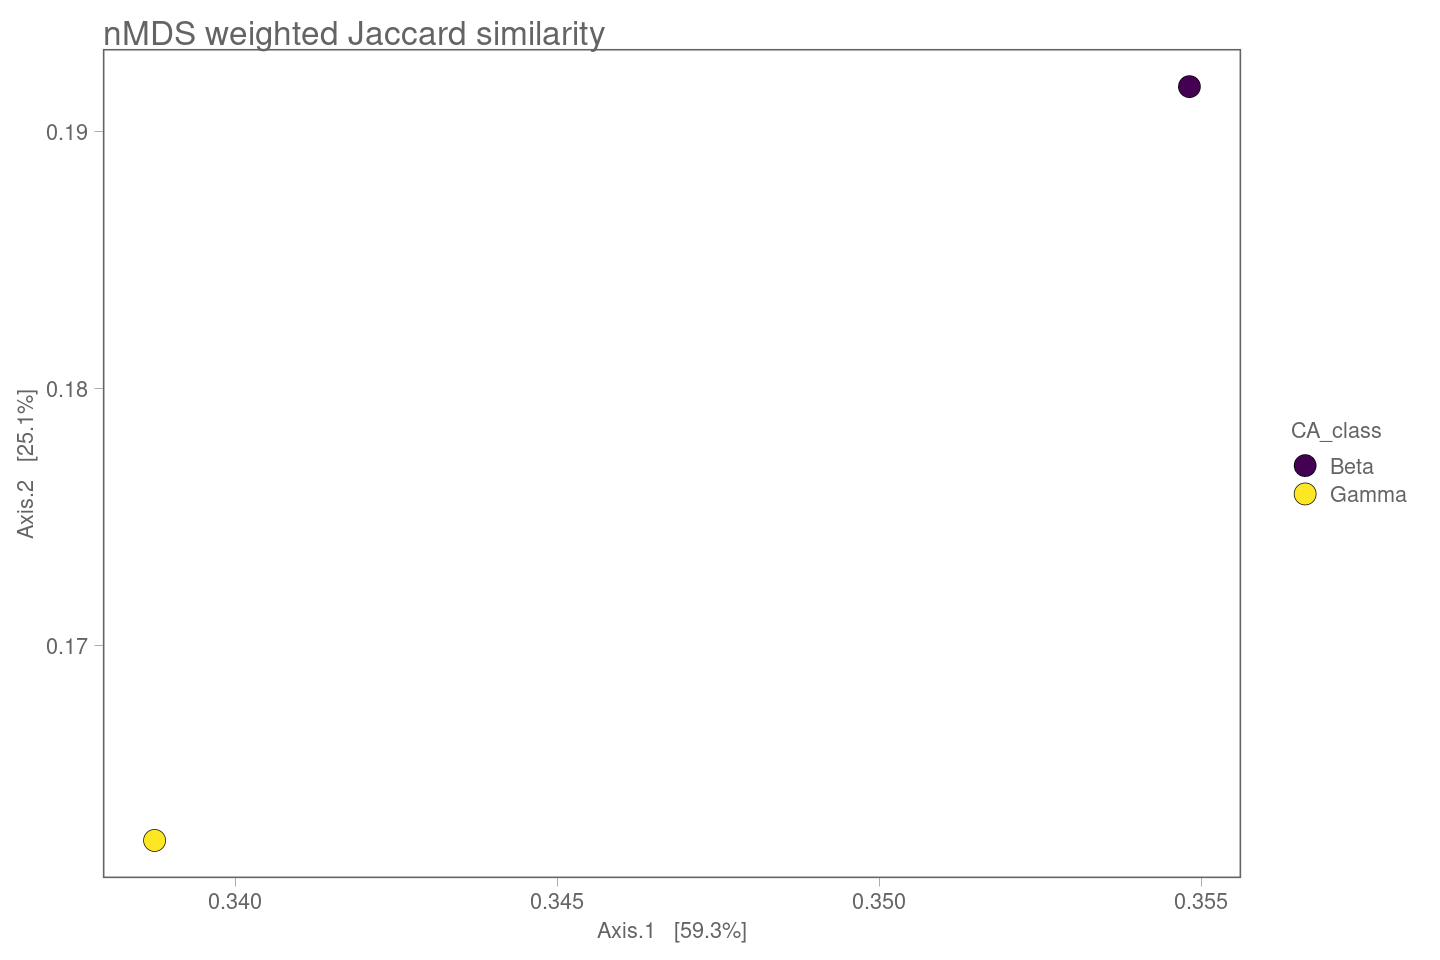

In [21]:
plot_ordination(CAs, CAs_jw, type="taxa",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=CA_class),shape=21, size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## nMDS unweighted jaccard

In [22]:
CAs_wjac <- phyloseq::distance(CAs, method = "jaccard")
CAs_unjac <- phyloseq::distance(CAs, method = "jaccard", binary = TRUE)

In [23]:
CAs_juw <- ordinate(CAs, CAs_unjac, method = "NMDS",trymax=100)

Run 0 stress 1.895513e-16 
Run 1 stress 0.01647232 
Run 2 stress 0 
... New best solution
... Procrustes: rmse 0.06886231  max resid 0.2853707 
Run 3 stress 0 
... Procrustes: rmse 0.06955703  max resid 0.5756285 
Run 4 stress 0 
... Procrustes: rmse 0.07194763  max resid 0.570281 
Run 5 stress 0 
... Procrustes: rmse 0.07561454  max resid 0.6898848 
Run 6 stress 0 
... Procrustes: rmse 0.0753526  max resid 0.6817199 
Run 7 stress 0.02455644 
Run 8 stress 0.005376539 
Run 9 stress 0 
... Procrustes: rmse 0.07832298  max resid 0.7101893 
Run 10 stress 0 
... Procrustes: rmse 0.06054721  max resid 0.3308043 
Run 11 stress 0 
... Procrustes: rmse 0.0720202  max resid 0.6040838 
Run 12 stress 0 
... Procrustes: rmse 0.0739744  max resid 0.6506212 
Run 13 stress 0 
... Procrustes: rmse 0.05051766  max resid 0.1221906 
Run 14 stress 0 
... Procrustes: rmse 0.06571127  max resid 0.4589405 
Run 15 stress 0 
... Procrustes: rmse 0.07681013  max resid 0.7092236 
Run 16 stress 0 
... Procrustes: 

Warning message in metaMDS(ps.dist):
“stress is (nearly) zero: you may have insufficient data”


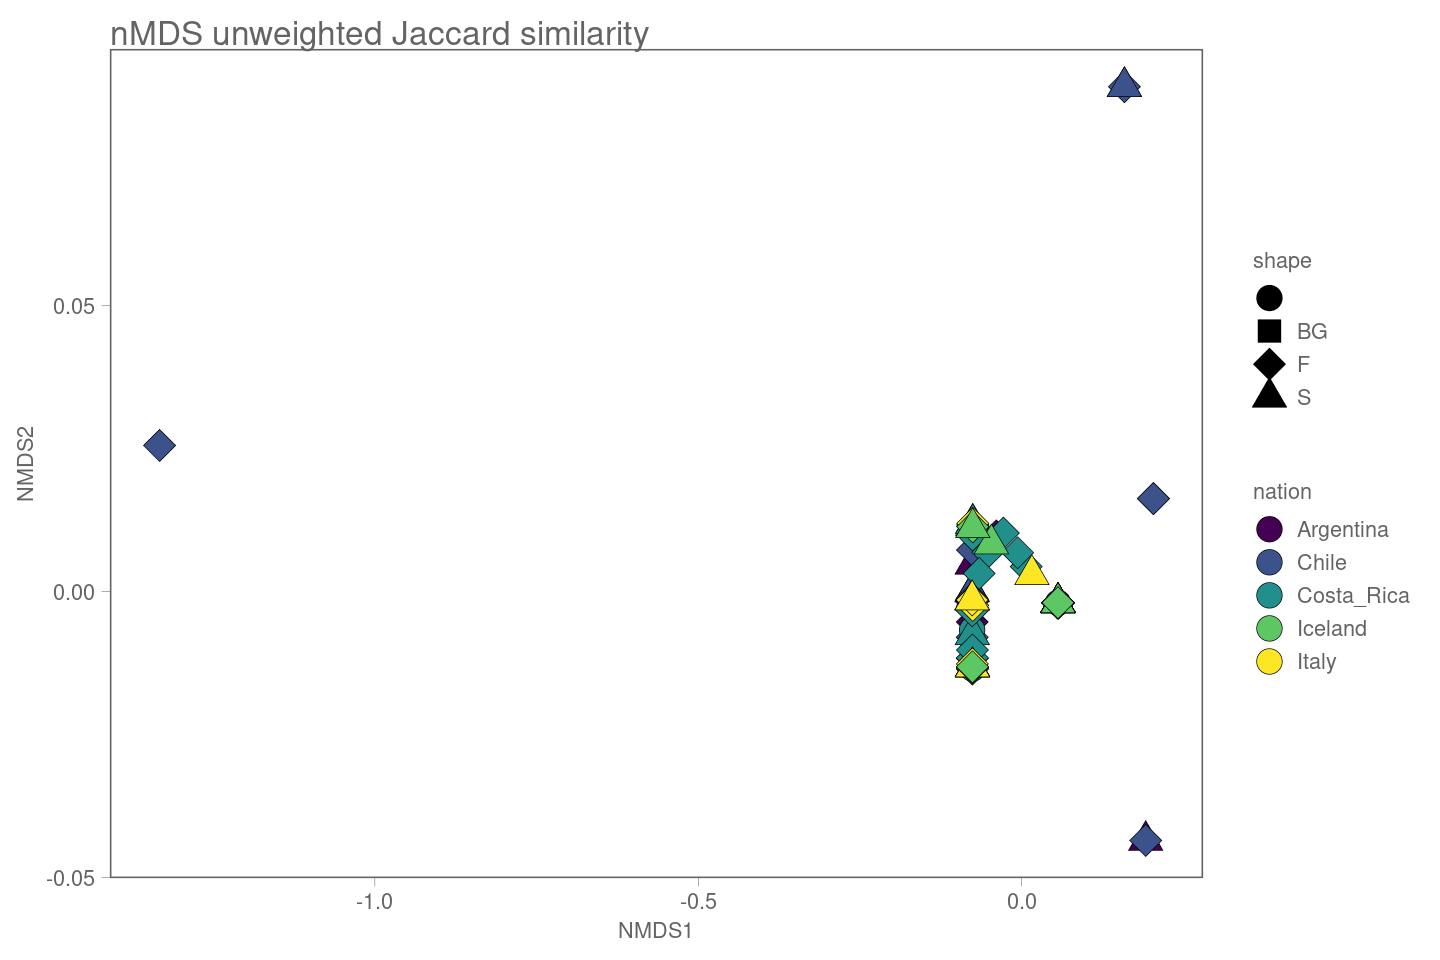

In [24]:
plot_ordination(CAs, CAs_juw, type="samples",title="nMDS unweighted Jaccard similarity") +

        geom_point(aes(fill=nation,shape=type),size=7,color="black",stroke=0.3) + 

        #geom_text(aes(label= nation), size=4, hjust=0.4,vjust=2) + 

        scale_fill_viridis(discrete=TRUE) + scale_shape_manual(values=c(21:24)) +

        theme_glab() + theme(legend.position = "right") +

        guides(fill = guide_legend(override.aes = list(shape = 21) ),
              shape = guide_legend(override.aes = list(fill = "black")))

In [25]:
CAs_jw <- ordinate(CAs,CAs_wjac, method = "NMDS",trymax=100)

Run 0 stress 0.04914769 
Run 1 stress 0.04996071 
Run 2 stress 0.04996114 
Run 3 stress 0.05870215 
Run 4 stress 0.05667499 
Run 5 stress 0.05669513 
Run 6 stress 0.0580897 
Run 7 stress 0.04914907 
... Procrustes: rmse 0.001579877  max resid 0.005941178 
... Similar to previous best
Run 8 stress 0.05013341 
Run 9 stress 0.0502404 
Run 10 stress 0.04996014 
Run 11 stress 0.05024029 
Run 12 stress 0.05024054 
Run 13 stress 0.05011612 
Run 14 stress 0.05023972 
Run 15 stress 0.05023991 
Run 16 stress 0.05690873 
Run 17 stress 0.04995969 
Run 18 stress 0.04995983 
Run 19 stress 0.05811319 
Run 20 stress 0.050301 
*** Best solution repeated 1 times


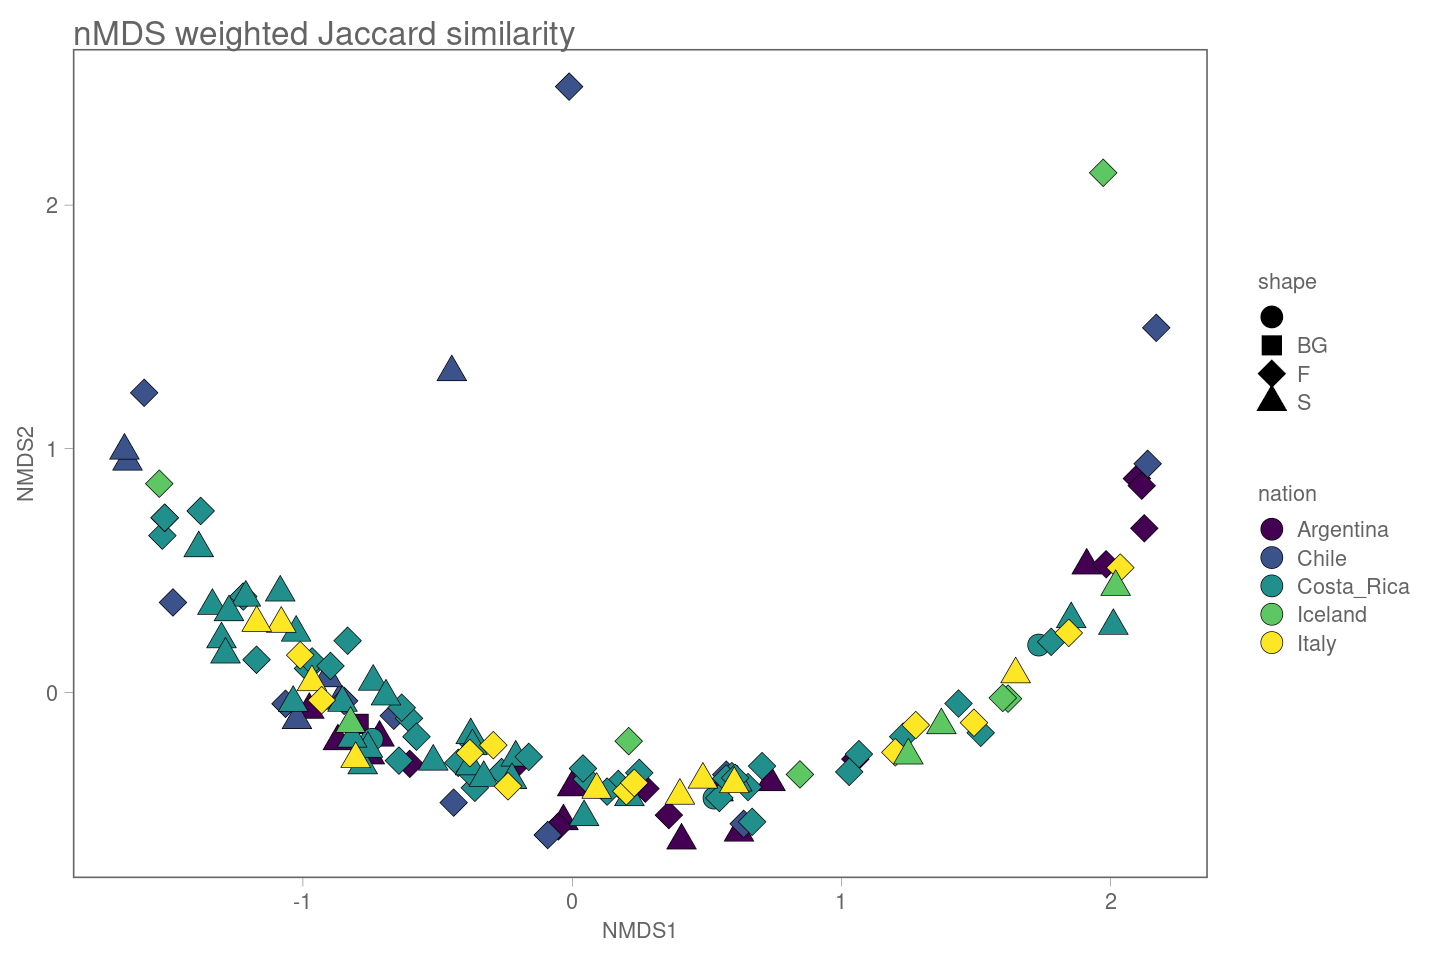

In [26]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=nation, shape=type),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=T) + 

    scale_shape_manual(values=c(21:24)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

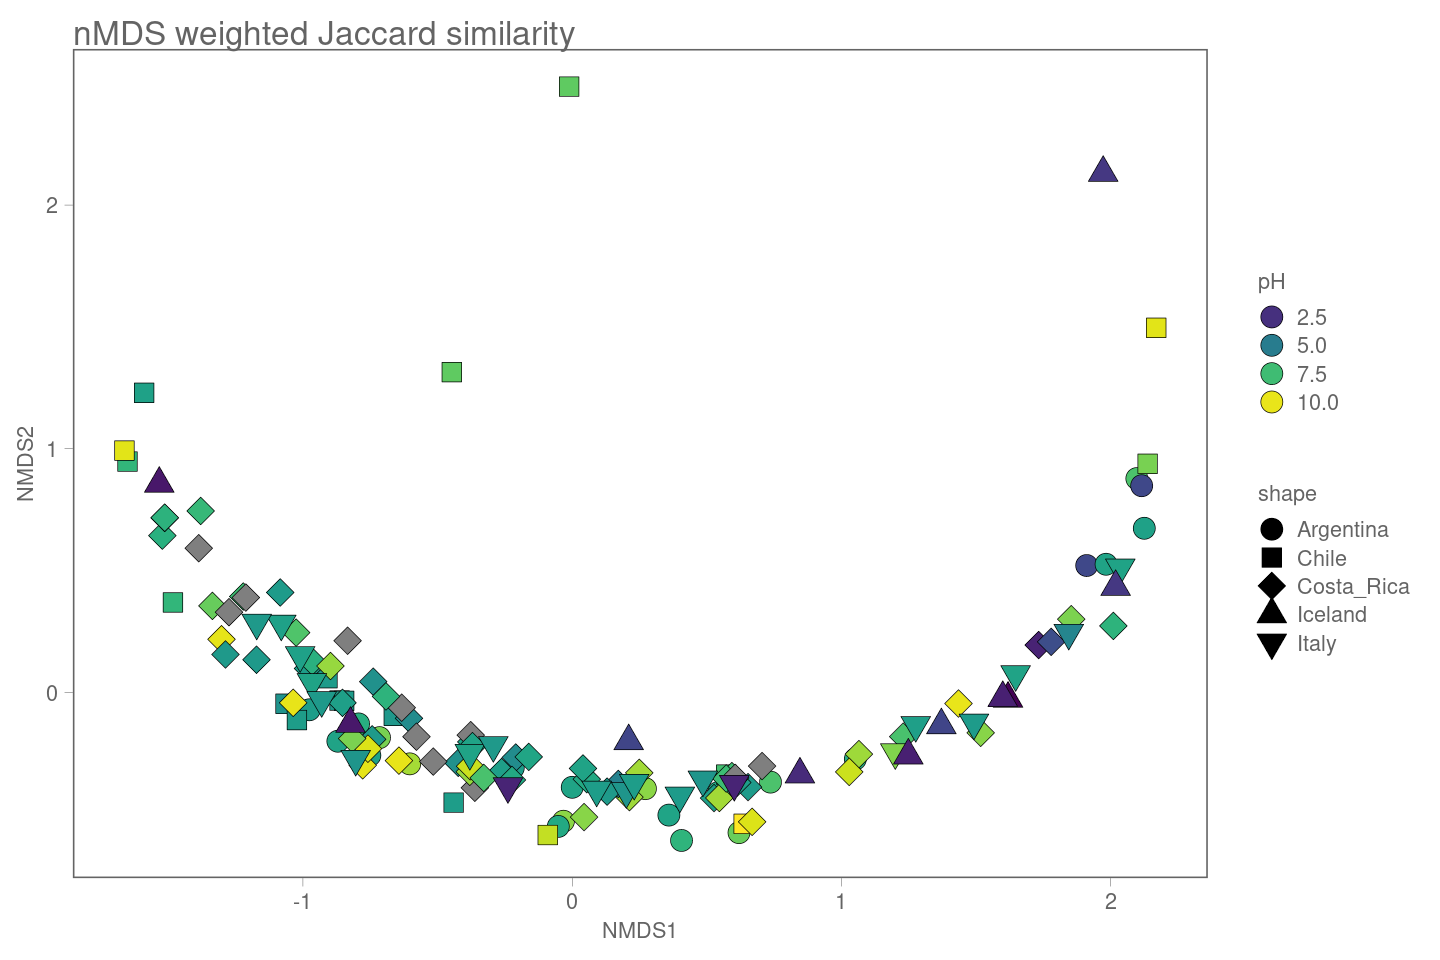

In [27]:
plot_ordination(CAs, CAs_jw, type="samples",title="nMDS weighted Jaccard similarity") +

    geom_point(aes(fill=pH,shape=nation),size=6,color="black",stroke=0.3) + 

    #geom_text(aes(label= nation), size=4, hjust=0.2,vjust=2) +

    scale_fill_viridis(discrete=F) + 

    scale_shape_manual(values=c(21:25)) +

    theme_glab() + theme(legend.position = "right") +

    guides(fill = guide_legend(override.aes = list(shape = 21) ),
            shape = guide_legend(override.aes = list(fill = "black")))

## Vector Fitting Weighted Jaccard

In [28]:
nmds_df1_jw<-cbind(sample_data(CAs),CAs_jw$points)
nmds_df1_jw

,expedition,nation,site_name,latitude,longitude,type,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,ARG19,Argentina,Pastos Grandes,-24.36459,-66.57113,S,44.90,8.74,-15.33,50.0,0.61,15.400,1288,-3.251304e-02,-0.52784738
AG13,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85819,-66.99269,S,80.00,7.75,-14.81,10.0,0.19,NA,429,7.364368e-01,-0.36737067
AG15,ARG19,Argentina,Galán Fumaroles (El Diablo),-25.85824,-66.99282,S,80.00,3.21,-12.40,60.0,1.02,21.120,2050,1.910647e+00,0.52133294
AG17,ARG19,Argentina,Galán La Colcha,-26.03291,-66.98609,BG,84.00,6.94,-2.62,20.0,6.10,300.080,10618,-7.932208e-01,-0.12854700
AG19,ARG19,Argentina,Botijuela,-25.74303,-67.82325,S,40.00,6.44,NA,10.0,8.65,700.480,14643,-7.514879e-01,-0.25772784
AG1,ARG19,Argentina,Incachule,-24.28213,-66.46676,S,46.90,6.52,NA,10.0,1.54,NA,3000,-8.702897e-01,-0.19963723
AG22,ARG19,Argentina,Rosario de la Frontera,-25.40986,-64.59134,S,82.00,8.23,-8.28,0.0,1.57,151.800,3056,6.193932e-01,-0.57462486
AG24,ARG19,Argentina,El Galpón,-24.40986,-64.59146,S,54.30,8.47,-10.67,0.0,1.81,94.662,3474,-7.155138e-01,-0.18483180
AG3,ARG19,Argentina,Pompeya,-24.24669,-66.36272,S,50.30,6.53,-5.33,10.0,5.09,930.309,9000,8.289817e-05,-0.38862252


In [29]:
nmds_df1.1_jw <- nmds_df1_jw[,4:15]

nmds_df1.1_jw <- nmds_df1.1_jw[ -c(3) ]

nmds_df1.1_jw


,latitude,longitude,temperature,pH,C13,dissolved_oxygen,salinity,alkalinity,spc,MDS1,MDS2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG11,-24.36459,-66.57113,44.90,8.74,-15.33,50.0,0.61,15.400,1288,-3.251304e-02,-0.52784738
AG13,-25.85819,-66.99269,80.00,7.75,-14.81,10.0,0.19,NA,429,7.364368e-01,-0.36737067
AG15,-25.85824,-66.99282,80.00,3.21,-12.40,60.0,1.02,21.120,2050,1.910647e+00,0.52133294
AG17,-26.03291,-66.98609,84.00,6.94,-2.62,20.0,6.10,300.080,10618,-7.932208e-01,-0.12854700
AG19,-25.74303,-67.82325,40.00,6.44,NA,10.0,8.65,700.480,14643,-7.514879e-01,-0.25772784
AG1,-24.28213,-66.46676,46.90,6.52,NA,10.0,1.54,NA,3000,-8.702897e-01,-0.19963723
AG22,-25.40986,-64.59134,82.00,8.23,-8.28,0.0,1.57,151.800,3056,6.193932e-01,-0.57462486
AG24,-24.40986,-64.59146,54.30,8.47,-10.67,0.0,1.81,94.662,3474,-7.155138e-01,-0.18483180
AG3,-24.24669,-66.36272,50.30,6.53,-5.33,10.0,5.09,930.309,9000,8.289817e-05,-0.38862252


In [30]:
message("Test with Pearson correlation vs NMDS1:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS1)
       if (a$p.value<0.05) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

message("Test with Pearson correlation vs NMDS2:")
# Pearson
for (i in 1:length(nmds_df1.1_jw)) {
    a <- cor.test(nmds_df1.1_jw[,i], nmds_df1.1_jw$MDS2)
       if (a$p.value<0.01) {
           print(paste(i,colnames(nmds_df1.1_jw)[i],a$estimate, a$parameter, a$p.value))
       }
}

Test with Pearson correlation vs NMDS1:



[1] "2 longitude 0.199886501762884 137 0.0183140581271497"
[1] "3 temperature 0.406786061209734 127 1.7203912884904e-06"
[1] "4 pH -0.185762442971632 126 0.0357857100461096"
[1] "7 salinity -0.246142316508468 117 0.00696734356186967"
[1] "9 spc -0.228085045330982 122 0.010840435336551"
[1] "10 MDS1 1 137 0"


Test with Pearson correlation vs NMDS2:



[1] "6 dissolved_oxygen 0.288463174797868 102 0.00298186490940164"
[1] "11 MDS2 1 137 0"


In [31]:
env_jw <-envfit(nmds_df1.1_jw[,c(10:11)], nmds_df1.1_jw[,c(1:9)], perm = 9999, na.rm = T)
env_jw


***VECTORS

                     MDS1     MDS2     r2 Pr(>r)   
latitude         -0.52249 -0.85265 0.0448 0.7077   
longitude        -0.53014 -0.84791 0.0428 0.7242   
temperature       0.99571 -0.09251 0.4050 0.0079 **
pH               -0.26583 -0.96402 0.2776 0.0510 . 
C13              -0.12694 -0.99191 0.1602 0.2175   
dissolved_oxygen -0.32566  0.94549 0.1096 0.3648   
salinity         -0.80679  0.59084 0.2186 0.0952 . 
alkalinity        0.03440 -0.99941 0.1407 0.2521   
spc              -0.76750  0.64105 0.1949 0.1138   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Permutation: free
Number of permutations: 9999

118 observations deleted due to missingness

In [32]:
env.scores_jw <- as.data.frame(scores(env_jw, display = "vectors"))         #extracts relevant scores from envifit
env.scores_jw <- cbind(env.scores_jw, env.variables = rownames(env.scores_jw)) #and then gives them their names

env.scores_jw <- cbind(env.scores_jw, pval = env_jw$vectors$pvals) # add pvalues to dataframe
sig.env.scrs_jw <- subset(env.scores_jw, pval<=0.15) #subset data to show variables significant at 0.05

sig.env.scrs_jw

,MDS1,MDS2,env.variables,pval
,<dbl>,<dbl>,<chr>,<dbl>
temperature,0.6336867,-0.05887593,temperature,0.0079
pH,-0.1400556,-0.50790899,pH,0.0510
salinity,-0.3772515,0.27627539,salinity,0.0952
spc,-0.3388602,0.28302963,spc,0.1138


In [33]:
en_coord_cont.1_jw = sig.env.scrs_jw[,1:2] * ordiArrowMul(env_jw)
en_coord_cont.1_jw

,MDS1,MDS2
,<dbl>,<dbl>
temperature,0.7500000,-0.06968262
pH,-0.1657628,-0.60113580
salinity,-0.4464961,0.32698580
spc,-0.4010581,0.33497978


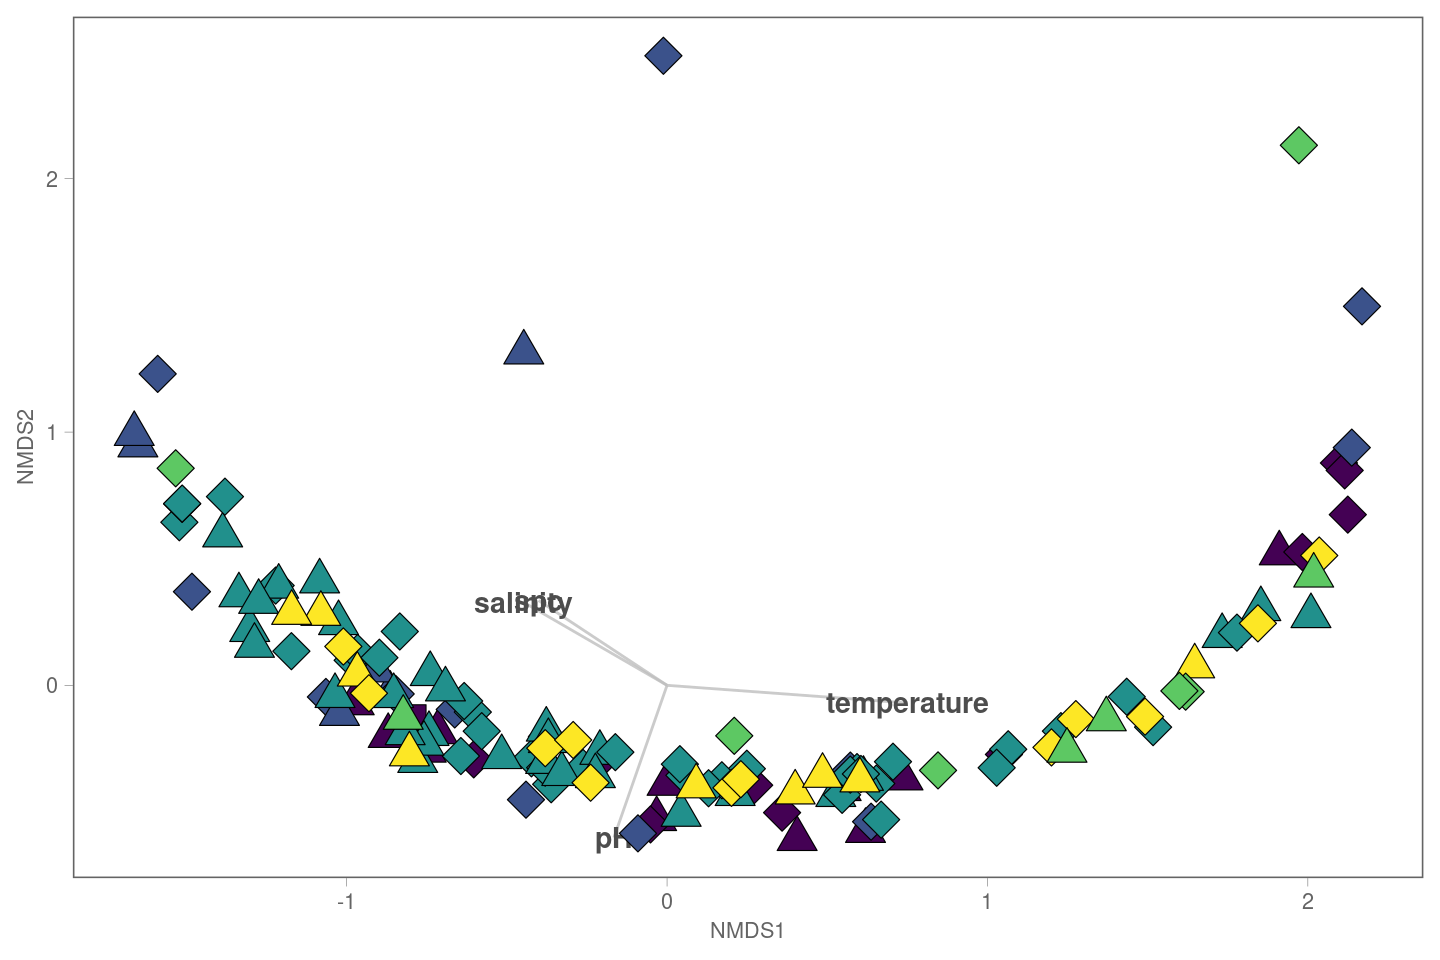

In [34]:
nmds_jw_envfit <- ggplot(data = nmds_df1_jw, aes(x = MDS1, y = MDS2)) + 
     
        geom_segment(data = en_coord_cont.1_jw, aes(x = 0, y = 0, xend = MDS1, yend = MDS2), 
                            size =.8, alpha = 0.8, colour = "grey") + 
     
        geom_text(data = en_coord_cont.1_jw, aes(x = MDS1, y = MDS2), colour = "grey30", 
                         fontface = "bold", size=6, label = row.names(en_coord_cont.1_jw)) + 
     
        geom_point(aes(fill = nation ,shape = type), size = 8) +
    
        scale_fill_viridis(discrete=TRUE) +
     
        scale_shape_manual(values = c(24,22,23,24,25)) + 
     
        # geom_text(aes(label = type), size=5, hjust=0.2, vjust=2) +
     
        theme(axis.title = element_text(size = 15, face = "bold", colour = "black"), 
                   panel.background = element_blank(), panel.border = element_rect(fill = NA, colour = "black"), 
                   axis.ticks = element_blank(), legend.key = element_blank(), 
                   legend.title = element_text(size = 10, face = "bold", colour = "grey30"), 
                   legend.text = element_text(size = 9, colour = "grey30")) + 
       
        xlab("NMDS1") + ylab("NMDS2") + 
       
        guides(fill = guide_legend(override.aes = list(shape = 22) ),
            shape = guide_legend(override.aes = list(fill = "black"))) + 
        
        theme_glab() + 

        theme(legend.position = "none")

nmds_jw_envfit